In [1]:
# Module Importations
import datetime
from matplotlib import pyplot as plt
import pandas as pd 
import seaborn as sns
print(sns.__version__)

0.10.0


In [2]:
# Custom Module Importations
from Source.data import load_data
from Source.features import data_munging
from Source.visualisation import figures_helper

In [3]:
# Constants
SAVE_FIGURES = False

In [4]:
# Load each dataset
df_plant1_gen = load_data.load_data('Plant_1_Generation_Data.csv')
df_plant1_weather = load_data.load_data('Plant_1_Weather_Sensor_Data.csv')
df_plant2_gen = load_data.load_data('Plant_1_Generation_Data.csv')
df_plant2_weather = load_data.load_data('Plant_2_Weather_Sensor_Data.csv')

In [5]:
# Plant 1 Generation Summary
print("Sample:", "\n", df_plant1_gen.head(), "\n")
print(df_plant1_gen.info(), "\n")
print("Stats:", "\n", df_plant1_gen.describe().T, "\n")

Sample: 
           DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non

In [6]:
# Plant 1 Weather Summary
print("Sample:", "\n", df_plant1_weather.head(), "\n")
print(df_plant1_weather.info(), "\n")
print("Stats:", "\n", df_plant1_weather.describe().T, "\n")

Sample: 
              DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY

In [7]:
# Plant 2 Generation Summary
print("Sample:", "\n", df_plant2_gen.head(), "\n")
print(df_plant2_gen.info(), "\n")
print("Stats:", "\n", df_plant2_gen.describe().T, "\n")

Sample: 
           DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non

In [8]:
# Plant 2 Weather Summary
print("Sample:", "\n", df_plant2_weather.head(), "\n")
print(df_plant2_weather.info(), "\n")
print("Stats:", "\n", df_plant2_weather.describe().T, "\n")

Sample: 
              DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY

In [9]:
# Data Munging - Adding DateTime column

# Plant 1 Generation
df_plant1_gen['DATE_TIME'] = df_plant1_gen.apply(lambda row: data_munging.return_datetime('generation', row['DATE_TIME']), axis = 1)

# Plant 1 Weather
df_plant1_weather['DATE_TIME'] = df_plant1_weather.apply(lambda row: data_munging.return_datetime('weather', row['DATE_TIME']), axis = 1)

# Plant 2 Generation
df_plant2_gen['DATE_TIME'] = df_plant2_gen.apply(lambda row: data_munging.return_datetime('generation', row['DATE_TIME']), axis = 1)

# Plant 1 Weather
df_plant2_weather['DATE_TIME'] = df_plant2_weather.apply(lambda row: data_munging.return_datetime('weather', row['DATE_TIME']), axis = 1)

In [10]:
# Data Munging - Add Cell Number Column

# Plant 1 Generation
df_plant1_gen['CELL_NO'] = df_plant1_gen.apply(lambda row: data_munging.return_cell_number(row['SOURCE_KEY']), axis = 1)

# Plant 2 Generation
df_plant2_gen['CELL_NO'] = df_plant2_gen.apply(lambda row: data_munging.return_cell_number(row['SOURCE_KEY']), axis = 1)

In [11]:
# Save Modified Datasets

# Name datasets
df_plant1_gen.name = "df_plant1_gen"
df_plant1_weather.name = "df_plant1_weather"
df_plant2_gen.name = "df_plant2_gen"
df_plant2_weather.name = "df_plant2_weather"

datasets = [df_plant1_gen, df_plant1_weather, df_plant2_gen, df_plant2_weather]

for dataset in datasets:
    load_data.pickle_data(dataset, dataset.name)

Pickled dataframe to: C:/Developer/solar-power-generation-project/Data/Interim/df_plant1_gen.pkl
Pickled dataframe to: C:/Developer/solar-power-generation-project/Data/Interim/df_plant1_weather.pkl
Pickled dataframe to: C:/Developer/solar-power-generation-project/Data/Interim/df_plant2_gen.pkl
Pickled dataframe to: C:/Developer/solar-power-generation-project/Data/Interim/df_plant2_weather.pkl


In [12]:
# Isolate df for short time period
start_date = '14-05-2020'
end_date = '18-05-2020'
boolean_mask = (df_plant1_gen['DATE_TIME'] > start_date) & (df_plant1_gen['DATE_TIME'] <= end_date)

df_plant1_short = df_plant1_gen[boolean_mask]
print(df_plant1_short)

      DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0    2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1    2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2    2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3    2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4    2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   
...         ...       ...              ...       ...       ...          ...   
6017 2020-05-18   4135001  uHbuxQJl8lW7ozc       0.0       0.0          0.0   
6018 2020-05-18   4135001  wCURE6d3bPkepu2       0.0       0.0          0.0   
6019 2020-05-18   4135001  z9Y9gH1T5YWrNuG       0.0       0.0       1871.5   
6020 2020-05-18   4135001  zBIq5rxdHJRwDNY       0.0       0.0          0.0   
6021 2020-05-18   4135001  zVJPv84UY57bAof       0.0       0.0          0.0   

      TOTAL_YIELD CELL_NO  
0       6259559.0      

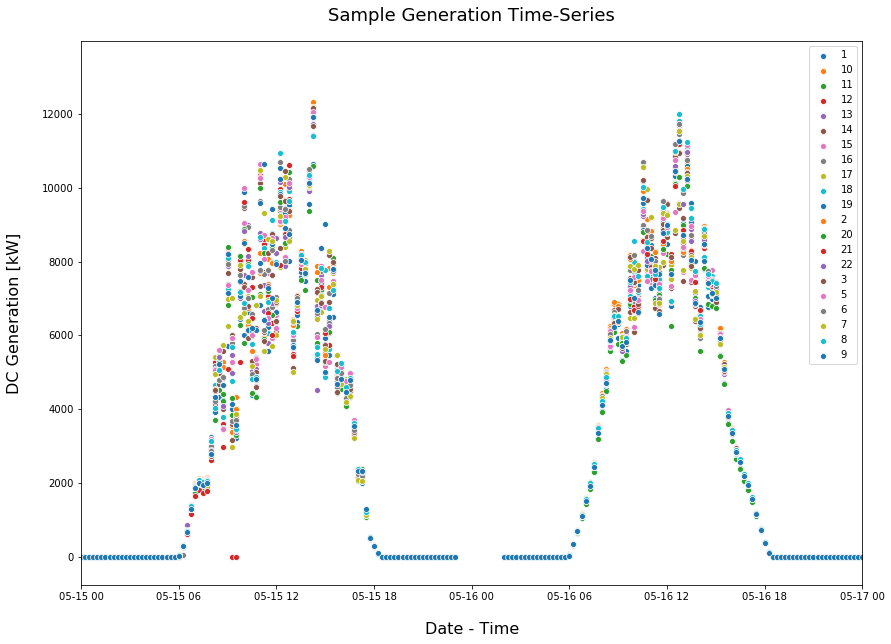

In [13]:
# Plot Generation for multiple cells versus short time
fig, ax = plt.subplots(figsize = (14, 10))

# Generate plot
for SOURCE_KEY, data in df_plant1_short.groupby('CELL_NO'):
    sns.scatterplot(data = data, x = 'DATE_TIME', y = 'DC_POWER', ax = ax, label = SOURCE_KEY)

# Set x limits
ax.set_xlim([datetime.date(2020, 5, 15), datetime.date(2020, 5, 17)])

# Set title, axis, legend
plt.title("Sample Generation Time-Series", fontsize = figures_helper.TITLE_FONTSIZE, pad = 20)
plt.xlabel("Date - Time", fontsize = 16, labelpad = 20)
plt.ylabel("DC Generation [kW]", fontsize = 16, labelpad = 20)

# Save fig
if SAVE_FIGURES == True: 
    name = 'DC_Generation_Time_Series'
    save_string = figures_helper.generate_fig_save_string(name)
    plt.savefig(save_string, format = figures_helper.SAVE_FORMAT, dpi = figures_helper.SAVE_DPI)

plt.show()

In [14]:
# Investigate behaviour of small sample of cells
contains_cell1 = df_plant1_gen[df_plant1_gen['SOURCE_KEY'] == '1BY6WEcLGh8j5v7']
contains_cell2 = df_plant1_gen[df_plant1_gen['SOURCE_KEY'] == 'ZnxXDlPa8U1GXgE']
contains_cell3 = df_plant1_gen[df_plant1_gen['SOURCE_KEY'] == 'pkci93gMrogZuBj']

frames = [contains_cell1, contains_cell2, contains_cell3]

df_cells_gen = pd.concat(frames, ignore_index = True)

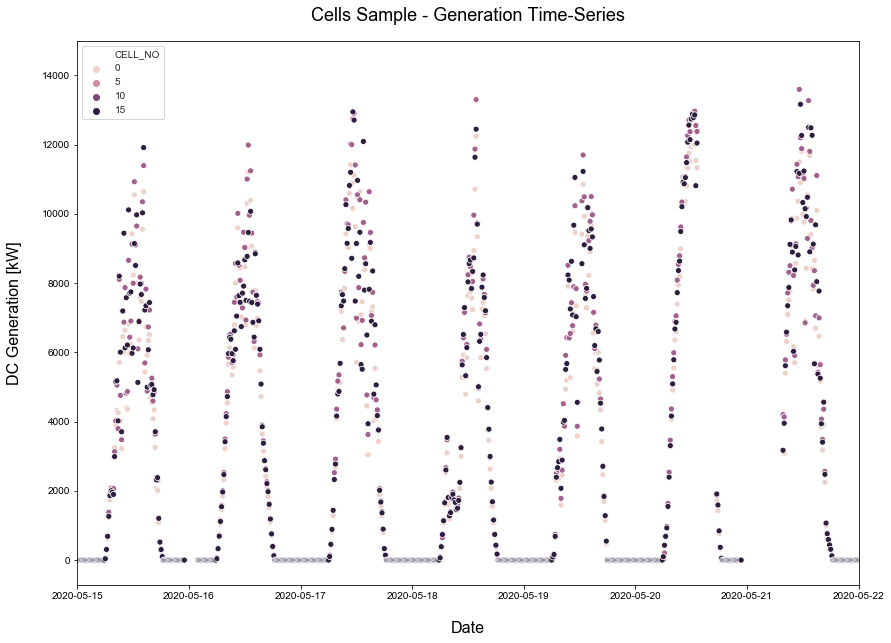

In [16]:
# Plot Generation for one cell as time series
fig, ax = plt.subplots(figsize = (14, 10))

# Generate plot
sns.set_style(style="whitegrid")
sns.scatterplot(data = df_cells_gen, x = 'DATE_TIME', y = 'DC_POWER', ax = ax, hue = 'CELL_NO')

# Set x limits
ax.set_xlim([datetime.date(2020, 5, 15), datetime.date(2020, 5, 22)])

# Set title, axis, legend
plt.title("Cells Sample - Generation Time-Series", fontsize = figures_helper.TITLE_FONTSIZE, pad = 20)
plt.xlabel("Date", fontsize = 16, labelpad = 20)
plt.ylabel("DC Generation [kW]", fontsize = 16, labelpad = 20)

# Save fig
if SAVE_FIGURES == True: 
    name = 'Cells_Gen_Time_Series'
    save_string = figures_helper.generate_fig_save_string(name)
    plt.savefig(save_string, format = figures_helper.SAVE_FORMAT, dpi = figures_helper.SAVE_DPI)

plt.show()

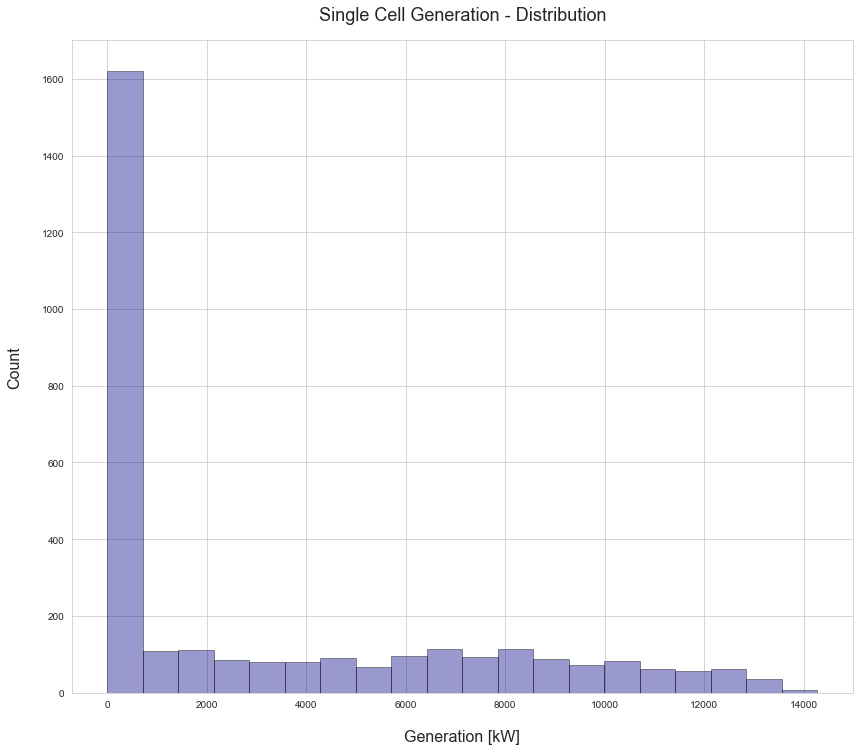

In [17]:
# Investigate distribution of one cell sample
df_cell1_gen = df_plant1_gen[df_plant1_gen['SOURCE_KEY'] == 'ZnxXDlPa8U1GXgE']

plt.figure(figsize = (14, 12))

# Create histogram
y_data = df_cell1_gen['DC_POWER']
sns.distplot(y_data, bins = 20, hist = True, kde = False, color = "darkblue", hist_kws = {'edgecolor':'black'})

# Set title, axes
plt.title("Single Cell Generation - Distribution", fontsize = figures_helper.TITLE_FONTSIZE, pad = 20)
plt.xlabel("Generation [kW]", fontsize = 16, labelpad = 20)
plt.ylabel("Count", fontsize = 16, labelpad = 20)

# Save fig
if SAVE_FIGURES == True: 
    name = 'Single_Cell_Gen_Distribution'
    save_string = figures_helper.generate_fig_save_string(name)
    plt.savefig(save_string, format = 'png', dpi = 600)

plt.show()

In [18]:
# Investigation into which cells produce most aggregate generation

df_time_series = df_plant1_gen.copy()

# Create dict for cells, min generation, max generation and aggregate total
aggregated_generation = {
    '1BY6WEcLGh8j5v7' : [0, 0, 0], '1IF53ai7Xc0U56Y' : [0, 0, 0], '3PZuoBAID5Wc2HD' : [0, 0, 0], '7JYdWkrLSPkdwr4' : [0, 0, 0],
 'McdE0feGgRqW7Ca' : [0, 0, 0], 'VHMLBKoKgIrUVDU' : [0, 0, 0], 'WRmjgnKYAwPKWDb' : [0, 0, 0], 'ZnxXDlPa8U1GXgE' : [0, 0, 0],
 'ZoEaEvLYb1n2sOq' : [0, 0, 0], 'adLQvlD726eNBSB' : [0, 0, 0], 'bvBOhCH3iADSZry' : [0, 0, 0], 'iCRJl6heRkivqQ3' : [0, 0, 0],
 'ih0vzX44oOqAx2f' : [0, 0, 0], 'pkci93gMrogZuBj' : [0, 0, 0], 'rGa61gmuvPhdLxV' : [0, 0, 0], 'sjndEbLyjtCKgGv' : [0, 0, 0],
 'uHbuxQJl8lW7ozc' : [0, 0, 0], 'wCURE6d3bPkepu2' : [0, 0, 0], 'z9Y9gH1T5YWrNuG' : [0, 0, 0], 'zBIq5rxdHJRwDNY' : [0, 0, 0],
 'zVJPv84UY57bAof' : [0, 0, 0], 'YxYtjZvoooNbGkE' : [0, 0, 0]
}

#print(aggregated_generation)

# Iterate over time-series to populate min and max generation for each cell
for key in aggregated_generation:

    df_generation = df_time_series[df_time_series['SOURCE_KEY'] == key]

    min_value = df_generation['TOTAL_YIELD'].min()
    max_value = df_generation['TOTAL_YIELD'].max()
    agg_value = max_value - min_value

    aggregated_generation[key] = [min_value, max_value, agg_value]

#print(aggregated_generation)

# Convert aggregate dict to dataframe
aggregate_df = pd.DataFrame.from_dict(aggregated_generation, orient = 'index')

aggregate_df.index.rename('SOURCE_KEY', inplace=True)
aggregate_df.columns = ['min_Yield', 'max_Yield', 'agg_Yield']

print(aggregate_df)

                 min_Yield  max_Yield  agg_Yield
SOURCE_KEY                                      
1BY6WEcLGh8j5v7  6259559.0  6485319.0   225760.0
1IF53ai7Xc0U56Y  6183645.0  6433566.0   249921.0
3PZuoBAID5Wc2HD  6987759.0  7237425.0   249666.0
7JYdWkrLSPkdwr4  7602960.0  7846821.0   243861.0
McdE0feGgRqW7Ca  7158964.0  7408587.0   249623.0
VHMLBKoKgIrUVDU  7206408.0  7456208.0   249800.0
WRmjgnKYAwPKWDb  7028673.0  7273532.0   244859.0
ZnxXDlPa8U1GXgE  6522172.0  6770737.0   248565.0
ZoEaEvLYb1n2sOq  7098099.0  7341753.0   243654.0
adLQvlD726eNBSB  6271355.0  6524508.0   253153.0
bvBOhCH3iADSZry  6316803.0  6539009.0   222206.0
iCRJl6heRkivqQ3  7177992.0  7426263.0   248271.0
ih0vzX44oOqAx2f  6185184.0  6426129.0   240945.0
pkci93gMrogZuBj  7169102.0  7415430.0   246328.0
rGa61gmuvPhdLxV  7111493.0  7356897.0   245404.0
sjndEbLyjtCKgGv  7016832.0  7261681.0   244849.0
uHbuxQJl8lW7ozc  7038681.0  7287002.0   248321.0
wCURE6d3bPkepu2  6782598.0  7028601.0   246003.0
z9Y9gH1T5YWrNuG  700